In [64]:
#import all necessary libaries
import numpy as np
import pandas as pd

In [65]:
data=pd.read_csv("Sentiment.csv")
#keeping only text and sentiment columns
data = data[['text','sentiment','candidate']]
data.shape

(13871, 3)

In [66]:
data.head(10)

,text,sentiment,candidate
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral,No candidate mentioned
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive,Scott Walker
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral,No candidate mentioned
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive,No candidate mentioned
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive,Donald Trump
5,"RT @GregAbbott_TX: @TedCruz: ""On my first day ...",Positive,Ted Cruz
6,RT @warriorwoman91: I liked her and was happy ...,Negative,No candidate mentioned
7,Going on #MSNBC Live with @ThomasARoberts arou...,Neutral,No candidate mentioned
8,Deer in the headlights RT @lizzwinstead: Ben C...,Negative,Ben Carson
9,RT @NancyOsborne180: Last night's debate prove...,Negative,No candidate mentioned


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       13871 non-null  object
 1   sentiment  13871 non-null  object
 2   candidate  13775 non-null  object
dtypes: object(3)
memory usage: 325.2+ KB


In [68]:
data.describe().transpose()

,count,unique,top,freq
text,13871,10402,RT @RWSurferGirl: Jeb Bush reminds me of eleva...,161
sentiment,13871,3,Negative,8493
candidate,13775,11,No candidate mentioned,7491


Percentage for default


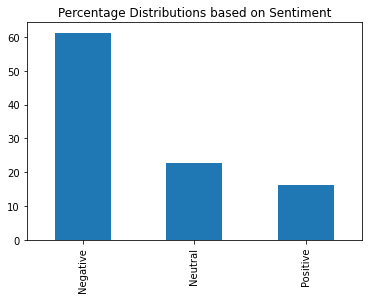

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Percentage for default")
round(data.sentiment.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title("Percentage Distributions based on Sentiment")
plt.show()

In [70]:
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
#splitting data into train and test set. Test set is 10% of orginal data
Independent_var = data.text
Dependent_var = data.sentiment
IV_Train, IV_Test, DV_Train, DV_Test = train_test_split(Independent_var, Dependent_var, test_size=0.1)

print("IV_Train : ",len(IV_Train))
print("IV_Test : ",len(IV_Test))
print("DV_Train : ",len(DV_Train))
print("DV_Test : ",len(DV_Test))

IV_Train :  12483
IV_Test :  1388
DV_Train :  12483
DV_Test :  1388


In [71]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [72]:
cv = CountVectorizer()
lgclassifier = LogisticRegression(solver = "lbfgs", max_iter=1000)

In [73]:
from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer',cv),('classifier',lgclassifier)])
model.fit(IV_Train,DV_Train)

from sklearn.metrics import confusion_matrix
predictions = model.predict(IV_Test)
confusion_matrix(predictions, DV_Test)

array([[712, 162,  76],
       [ 94, 120,  32],
       [ 42,  31, 119]], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy : ", accuracy_score(predictions, DV_Test))
print("precision : ", precision_score(predictions, DV_Test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_Test, average = 'weighted'))

Accuracy :  0.6851585014409222
precision :  0.7151344314512611
Recall :  0.6851585014409222


In [75]:
example1 = ["RT @DanScavino: #GOPDebate @realDonaldTrump delivered the highest ratings in the history of presidential debates"]
result1 = model.predict(example1)
print(result1)
example2 = ["RT @NancyOsborne180: Last night's debate proved it! #GOPDebate #BATsAsk @BadassTeachersA #TBATs"]
result2 = model.predict(example2)
print(result2)
example3 = ["Going on #MSNBC Live with @ThomasARoberts around 2 PM ET.  #GOPDebate"]
result3 = model.predict(example3)
print(result3)

['Positive']
['Negative']
['Neutral']


In [76]:
#separating positive and negative data
train_pos = IV_Train[data.sentiment=="Positive"]
train_neg = IV_Train[data.sentiment=="Negative"]

In [77]:
from wordcloud import WordCloud,STOPWORDS
#defining wordcloud function
def wordcloud_draw(data, color='black'):
    words = ' '.join(data)
    #cleaning the words
    cleaned_words = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                             ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color=color,
                          width=2500,
                          height=2000).generate(cleaned_words)
    plt.figure(1,figsize=(10,12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive Words


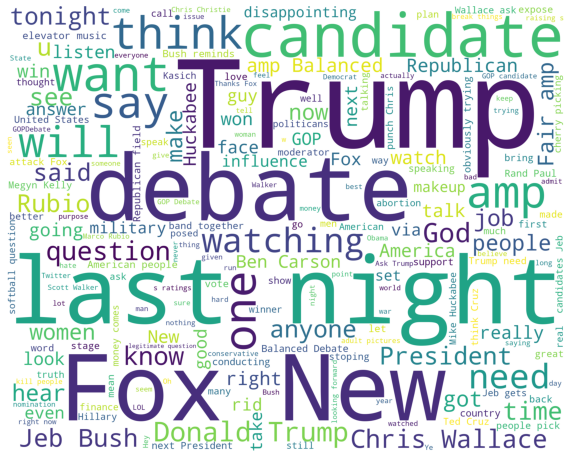

Negative Words


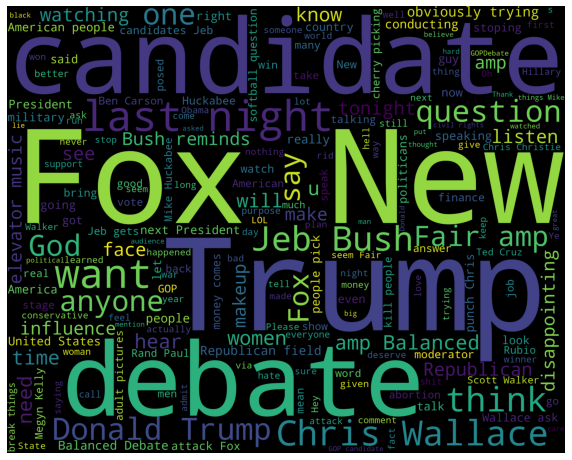

In [78]:
print("Positive Words")
wordcloud_draw(IV_Train,'white')
print("Negative Words")
wordcloud_draw(train_neg,'black')